<a href="https://colab.research.google.com/github/Fatemekm98/Machine-Learning/blob/main/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# بارگیری دیتاست digits
digits = load_digits()

# تقسیم داده‌ها به دو مجموعه آموزش و تست با نسبت 0.8 به 0.2
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# نمایش اندازه هر مجموعه
print(f"تعداد داده‌های آموزش: {len(X_train)}")
print(f"تعداد داده‌های تست: {len(X_test)}")

تعداد داده‌های آموزش: 1437
تعداد داده‌های تست: 360


In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
from sklearn.svm import SVC, LinearSVC
linear_model = LinearSVC(multi_class='crammer_singer', C=1e10)
linear_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10000000000.0, multi_class='crammer_singer')

In [ ]:
from sklearn.metrics import accuracy_score
# پیش‌بینی برچسب داده‌های تست
y_pred = linear_model.predict(X_train)
print("Predictions:", y_pred)

# محاسبه دقت مدل
accuracy = accuracy_score(y_train, y_pred)
print(f"acc: {accuracy}")

Predictions: [6 0 0 ... 2 7 1]
acc: 1.0


In [ ]:
from sklearn.metrics import accuracy_score
# پیش‌بینی برچسب داده‌های تست
y_pred = linear_model.predict(X_test)
print("Predictions:", y_pred)

# محاسبه دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"acc: {accuracy}")

Predictions: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 1 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 5 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 1 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 8 5 5 1 5 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 3 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
acc: 0.9694444444444444


In [ ]:
#Logistic
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1e10, multi_class='auto', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=10000000000.0, random_state=0, solver='liblinear')

In [ ]:
# تخمین برچسب داده‌های تست با استفاده از مدل آموزش دیده شده
predictions = model.predict(X_test)

# محاسبه دقت مدل
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9472222222222222


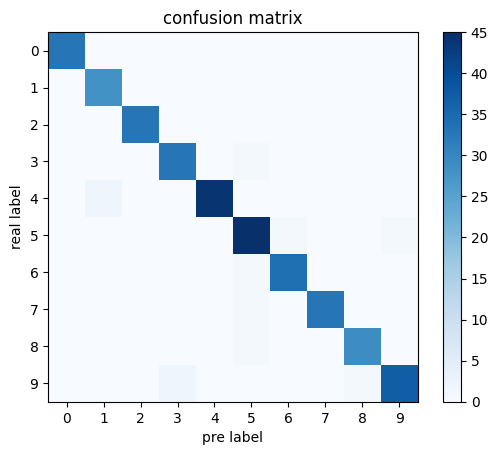

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# محاسبه ماتریس درهمریختگی
cm = confusion_matrix(y_test, y_pred)

# تنظیمات نمودار
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(digits.target_names))
plt.xticks(tick_marks, digits.target_names)
plt.yticks(tick_marks, digits.target_names)
plt.xlabel("pre label")
plt.ylabel("real label")

# نمایش نمودار
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# تعریف مدل با کرنل RBF
rbf_svc = SVC(kernel='rbf', )
rbf_svc = SVC(kernel='rbf', C=1e10)

# تعریف مقادیر مختلف برای پارامتر C
parameters = {'C': [0.1, 1, 10, 100]}

# انجام جستجوی خطی برای پیدا کردن مقدار بهینه برای C
clf = GridSearchCV(rbf_svc, parameters)
clf.fit(X_train, y_train)
best_C = clf.best_params_['C']
print("Best C:", best_C)

# آموزش مدل با کرنل RBF و مقدار بهینه برای C
rbf_svc = SVC(kernel='rbf', C=best_C)
rbf_svc.fit(X_train, y_train)

# پیش‌بینی برچسب داده‌های تست با کرنل RBF
y_pred_rbf = rbf_svc.predict(X_test)

# محاسبه دقت مدل با کرنل RBF
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of SVC model with optimal RBF and C kernel ({best_C}): {accuracy_rbf}")

Best C: 10
Accuracy of SVC model with optimal RBF and C kernel (10): 0.9861111111111112
